# Creating the dataset from ATLAS3D

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=67.8, Om0=0.308) # Assuming a cosmology

### Loading the two samples

In [8]:
capXV= np.loadtxt('./raw_data/ATLAS3D_CappellariXV_2013.txt',  usecols=[7,9,14])
capXX= np.loadtxt('./raw_data/ATLAS3D_CappellariXX_2013.txt', usecols=[2,3,4])
capI = np.loadtxt('./raw_data/ATLAS3D_CappellariI_2011.txt', usecols=[7,11])

# Let's cross match tables
GalaxyNameCapI = np.genfromtxt('./raw_data/ATLAS3D_CappellariI_2011.txt',usecols=[0],dtype='str')
GalaxyNameCapXX = np.genfromtxt('./raw_data/ATLAS3D_CappellariXX_2013.txt',usecols=[0],dtype='str')
_, indx_CapI, indx_CapXX = np.intersect1d(GalaxyNameCapI, GalaxyNameCapXX, assume_unique=True, return_indices=True,)

GalaxyName = GalaxyNameCapI[indx_CapI]

### Reading stellar masses and DM fraction

In [3]:
quality_flag = capXV[indx_CapXX,0]
Reff_arcsec = 10**capXV[indx_CapXX,1] # [arcsec]
logL = capXV[indx_CapXX,2] # [Lsun]
fDM = capXX[indx_CapXX,0]
logML = capXX[indx_CapXX,1] # Stellar mass-to-light ratio
M_stellar = 10**(logML+logL) # [Msun]

D = capI[indx_CapI,0] # Distance [Mpc units]
# pi radian = 180 degree ==> 1deg = pi/180 ==> 1arcsec = pi/180/3600
Reff_radian = Reff_arcsec * ( np.pi / 180 / 3600 )
Reff = Reff_radian * D * 1e3 # Effective radius [kpc units]


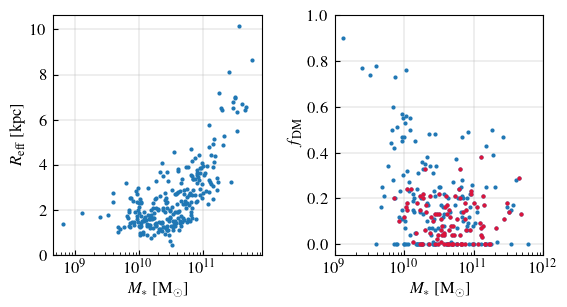

In [4]:
#################
# Plot parameters
params = {
    "font.size": 12,
    "font.family": "Times",
    "text.usetex": True,
    "figure.figsize": (7, 3),
    "figure.subplot.left": 0.25,
    "figure.subplot.right": 0.95,
    "figure.subplot.bottom": 0.15,
    "figure.subplot.top": 0.95,
    "figure.subplot.wspace": 0.35,
    "figure.subplot.hspace": 0.35,
    "lines.markersize": 2,
    "lines.linewidth": 1.5,
}
plt.rcParams.update(params)
plt.figure()
ax = plt.subplot(1, 2, 1)
plt.grid(linestyle='-', linewidth=0.3)

plt.plot(M_stellar, Reff, 'o')

#plt.axis([1e9, 1e12, 0, 10])
plt.xscale('log')
plt.ylabel(r"$R_{\mathrm{eff}}$ [kpc]")
plt.xlabel("$M_{*}$ [M$_{\odot}$]")
ax.tick_params(direction='in', axis='both', which='both', pad=4.5)

######
ax = plt.subplot(1, 2, 2)
plt.grid(linestyle='-', linewidth=0.3)

plt.plot(M_stellar, fDM, 'o')
select_quality = np.where(quality_flag >= 2)[0]
plt.plot(M_stellar[select_quality], fDM[select_quality], 'o', color='crimson')

plt.axis([1e9, 1e12, -0.05, 1])
plt.xscale('log')
plt.ylabel(r"$f_{\mathrm{DM}}$")
plt.xlabel("$M_{*}$ [M$_{\odot}$]")
ax.tick_params(direction='in', axis='both', which='both', pad=4.5)
plt.show()


### Making the final csv file

In [5]:
# Writing the data into a CSV file
with open('dataset/ATLAS3D.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)

    # Writing the name line and the unit line
    writer.writerow(["GalaxyName","M*[Msun]", "Reff[kpc]","fDM(Reff)", "ErrorfDM","QualityFlag"])

    # Looping through each element of the data
    for i in range(len(capXV)):

        Name = GalaxyName[i]
        Mi = M_stellar[i]
        fDMi = fDM[i]
        Ri = Reff[i]
        sigma_fdmeff = 0 #no errors provided
        Qi = quality_flag[i]
        # Writing the data into the CSV file
        writer.writerow([Name,Mi, Ri, fDMi, sigma_fdmeff, Qi])
        


In [6]:
import pandas as pd
# Reading the CSV file into a DataFrame
cappellari = pd.read_csv('dataset/ATLAS3D.csv')
cappellari

,GalaxyName,M*[Msun],Reff[kpc],fDM(Reff),ErrorfDM,QualityFlag
0,IC0560,9.885531e+09,1.879939,0.12,0,2.0
1,IC0598,1.247384e+10,1.546499,0.24,0,2.0
2,IC0676,1.383566e+10,2.968315,0.20,0,0.0
3,IC0719,3.388442e+10,1.516779,0.11,0,3.0
4,IC0782,9.183326e+09,2.834533,0.57,0,1.0
...,...,...,...,...,...,...
253,UGC05408,7.063176e+09,1.292529,0.00,0,0.0
254,UGC06062,3.111716e+10,1.955626,0.25,0,1.0
255,UGC06176,1.207814e+10,1.891121,0.50,0,0.0
256,UGC08876,2.792544e+10,1.124021,0.00,0,1.0


/var/folders/9d/kpkfshms4z18wjb2nmw1ylx95p_t9v/T/ipykernel_63781/3809491866.py:10: RuntimeWarning: divide by zero encountered in divide
  fDM_converted = 1. / (( (1./fDM) - 1.) / conversion + 1.)


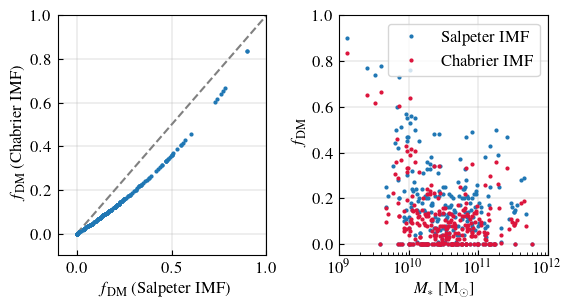

In [23]:
logL = capXV[indx_CapXX,2] # [Lsun]
fDM = capXX[indx_CapXX,0]
logML = capXX[indx_CapXX,1] # Stellar mass-to-light ratio
logML_JAM = capXX[indx_CapXX,2] # Total mass-to-light ratio

Ms = 10**(logL + logML)
MDM = 10**(logL + logML_JAM) / 2.

conversion = 10**(-0.25) # From Salpeter to Chabrier
fDM_converted = 1. / (( (1./fDM) - 1.) / conversion + 1.)

#################
# Plot parameters
params = {
    "font.size": 12,
    "font.family": "Times",
    "text.usetex": True,
    "figure.figsize": (7, 3),
    "figure.subplot.left": 0.25,
    "figure.subplot.right": 0.95,
    "figure.subplot.bottom": 0.15,
    "figure.subplot.top": 0.95,
    "figure.subplot.wspace": 0.35,
    "figure.subplot.hspace": 0.35,
    "lines.markersize": 2,
    "lines.linewidth": 1.5,
}
plt.rcParams.update(params)
plt.figure()
ax = plt.subplot(1, 2, 1)
plt.grid(linestyle='-', linewidth=0.3)

xrange = np.arange(0,1.1,0.1)
plt.plot(xrange,xrange,'--',color='grey')
plt.plot(fDM, fDM_converted, 'o')

plt.axis([-0.1, 1, -0.1, 1])
plt.ylabel(r"$f_{\mathrm{DM}}$ (Chabrier IMF)")
plt.xlabel(r"$f_{\mathrm{DM}}$ (Salpeter IMF)")
ax.tick_params(direction='in', axis='both', which='both', pad=4.5)

######
ax = plt.subplot(1, 2, 2)
plt.grid(linestyle='-', linewidth=0.3)

plt.plot(Ms, fDM, 'o', color='tab:blue',label='Salpeter IMF')
plt.plot(Ms, fDM_converted, 'o', color='crimson',label='Chabrier IMF')

plt.axis([1e9, 1e12, -0.05, 1])
plt.xscale('log')
plt.ylabel(r"$f_{\mathrm{DM}}$")
plt.xlabel("$M_{*}$ [M$_{\odot}$]")
ax.tick_params(direction='in', axis='both', which='both', pad=4.5)
plt.legend()
plt.show()